***Naive Bayes, Random Forest, Support Vector Machine (SVM), Ensembled Voting for Spam/Not Spam email prediction***

***Link to the dataset :https://drive.google.com/file/d/1a5rLTY1FCcAUyV_xutcGenISdNjvQJbV/view?usp=share_link***

In [1]:
import os
os.environ['SHELL'] = '/bin/bash'

In [2]:
!python -m pip install scikit-learn scipy matplotlib numpy
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install wordcloud
!pip install --upgrade pip 
!pip install --upgrade Pillow
!pip install numpy

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from wordcloud import WordCloud, STOPWORDS
import sys, os


#Creating a dataframe
df1 = pd.read_csv('train_cleaned-2.csv')

#Applying the lambda function to categorize the label
def categorize_label(label):
    if label == 1:
        return 'spam'
    else:
        return 'not spam'
    
df1['label'] = df1['label'].apply(categorize_label)
#Droped unnecessary column
df1.drop('cleaned-subject', axis=1, inplace=True)

In [4]:
df1.groupby('label').describe()

cleaned-text                   
                count unique    top freq
label                                   
not spam        28644  26374  vince  375
spam            10390  10015  hello   44

In [5]:
# Converting the label columns' values to spam=1 and not spam=0
df1['spam'] = df1['label'].apply(lambda x: 1 if x=='spam' else 0)
df1.head()
df1.rename(columns={'cleaned-text':'Text'}, inplace=True)
df1.update(df1['Text'])
df1

,label,Text,spam
0,not spam,go until jurong point crazy available only in ...,0
1,not spam,ok lar joking wif u oni,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,not spam,u dun say so early hor u c already then say,0
4,not spam,nah i dont think he go to usf he live around h...,0
...,...,...,...
39180,not spam,finally ready to show you be proud to introduc...,0
39181,not spam,1 isilotm 325 for palm o pocket pc and windows...,0
39182,not spam,alert bait and switch anticounterfeiting bill ...,0
39183,not spam,oneten 271102 insignificant matter heavily ove...,0


In [6]:
df1.dropna(inplace=True)
X_train,X_test,y_train,y_test = train_test_split(df1.Text,df1.spam,test_size=0.25)
df1.isna().sum()    

label    0
Text     0
spam     0
dtype: int64

In [7]:
countvector = CountVectorizer()
x_train_ct = countvector.fit_transform(X_train.values)
x_train_ct.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
# We will use Multinomial Naive Bayes as our model
modelMB = MultinomialNB()
modelMB.fit(x_train_ct, y_train)

MultinomialNB()

In [9]:
# Pre-test notspam
email_notspam = ['hey wanna get some coffee?']
email_notspam_count = countvector.transform(email_notspam)
modelMB.predict(email_notspam_count)

array([0])

In [10]:
# Pre-test spam
email_spam = ['reward click claim prize free money coupon discount bonus offer only for you 100 Earn back order now limited time offer 50 off today only']
email_spam_count = countvector.transform(email_spam)
email_spam_count
modelMB.predict(email_spam_count)

array([1])

***Naive Bayes Classifier***


In [11]:
# Testing the model 
x_test_count = countvector.transform(X_test)
naive_bayes_accuracy = modelMB.score(x_test_count, y_test)

# Report for Naive Bayes
y_pred = modelMB.predict(x_test_count)
f1_score(y_test, y_pred, average='macro')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7111
           1       0.84      0.90      0.87      2648

    accuracy                           0.93      9759
   macro avg       0.90      0.92      0.91      9759
weighted avg       0.93      0.93      0.93      9759



***Random Forest Classifier***

In [12]:
# Using Random Forest Classsifier as our model
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(x_train_ct, y_train)
rfc.score(x_test_count, y_test)
rfc.predict(email_spam_count)
random_forest_accuracy = accuracy_score(y_test, rfc.predict(x_test_count))

# Report for Random Forest
y_pred = rfc.predict(x_test_count)
f1_score(y_test, y_pred, average='macro')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7111
           1       0.92      0.84      0.88      2648

    accuracy                           0.94      9759
   macro avg       0.93      0.91      0.92      9759
weighted avg       0.94      0.94      0.94      9759



***Support Vector Machine (SVM) Classifier***

In [13]:
# Using Support Vector Machine as our model
svm_model = SVC()
svm_model.fit(x_train_ct, y_train)
x_test_count = countvector.transform(X_test)
svm_predictions = svm_model.predict(x_test_count)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Report for SVM
y_pred = svm_model.predict(x_test_count)
f1_score(y_test, y_pred, average='macro')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      7111
           1       0.98      0.56      0.71      2648

    accuracy                           0.88      9759
   macro avg       0.92      0.78      0.82      9759
weighted avg       0.89      0.88      0.86      9759



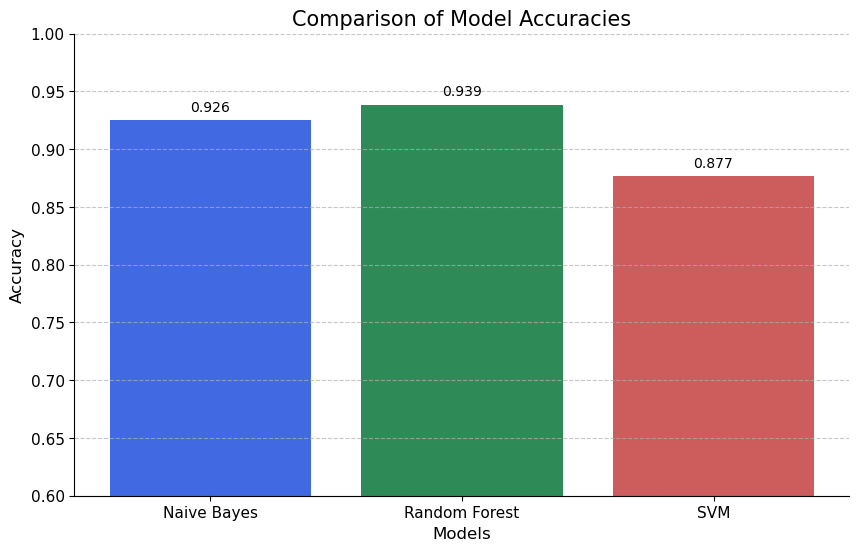

In [14]:
models = ['Naive Bayes', 'Random Forest', 'SVM']
accuracies = [naive_bayes_accuracy, random_forest_accuracy, svm_accuracy]

# Plotting
plt.figure(figsize=(10, 6))

bars = plt.bar(models, accuracies, color=['royalblue', 'seagreen', 'indianred'])

# Accuracy values on top of each bar
for bar in bars:
    val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.005, round(val, 3), ha='center', va='bottom')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Model Accuracies', fontsize=15)
plt.ylim(0.6, 1.0)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


***Ensemble Voting Classifier***

In [15]:
# Voting Classifier
voting_cf = VotingClassifier(estimators=[('nb', modelMB), ('rf', rfc), ('svm', svm_model)], voting='hard')
voting_cf.fit(x_train_ct, y_train)
voting_cf.score(x_test_count, y_test)
voting_cf_accuracy = accuracy_score(y_test, voting_cf.predict(x_test_count))

# Report for Voting Classifier
y_pred = voting_cf.predict(x_test_count)
f1_score(y_test, y_pred, average='macro')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7111
           1       0.98      0.80      0.88      2648

    accuracy                           0.94      9759
   macro avg       0.96      0.90      0.92      9759
weighted avg       0.94      0.94      0.94      9759



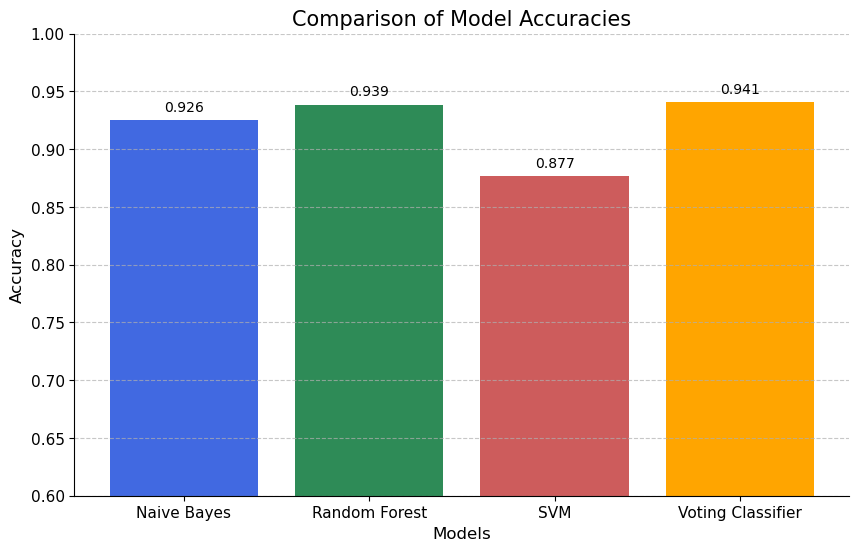

In [16]:
models = ['Naive Bayes', 'Random Forest', 'SVM', 'Voting Classifier']
accuracies = [naive_bayes_accuracy, random_forest_accuracy, svm_accuracy, voting_cf_accuracy]

# Plotting
plt.figure(figsize=(10, 6))

bars = plt.bar(models, accuracies, color=['royalblue', 'seagreen', 'indianred', 'orange'])

# Accuracy values on top of each bar
for bar in bars:
    val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.005, round(val, 3), ha='center', va='bottom')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Model Accuracies', fontsize=15)
plt.ylim(0.6, 1.0)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


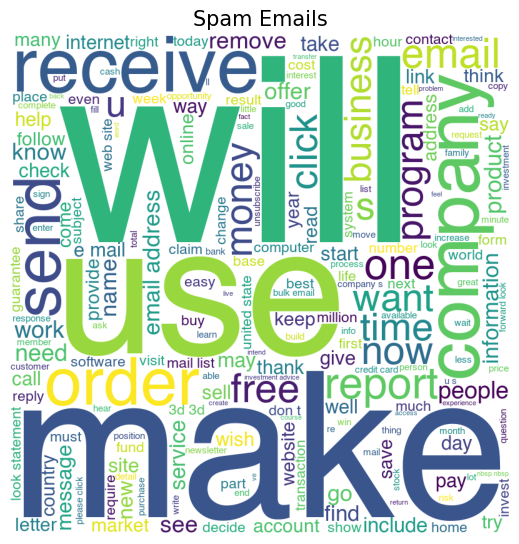

In [17]:
wc_font = os.path.join(os.getcwd(), 'Helvetica.ttf')

spam_text = ''.join(df1[df1.spam == 1]['Text'])
not_spam_text = ''.join(df1[df1.spam == 0]['Text'])

spam_wordcld = WordCloud(
    width=800,
    height=800,
    background_color='white',
    stopwords=None,
    min_font_size=10,
    font_path=wc_font
).generate(spam_text)

not_spam_wordcld = WordCloud(
    width=800,
    height=800,
    background_color='white',
    stopwords=None,
    min_font_size=10,
    font_path=wc_font
).generate(not_spam_text)

# Plotting Word Cloud for spam emails
plt.figure(figsize=(10, 10), facecolor=None)
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcld)
plt.title('Spam Emails', fontsize=15)
plt.axis('off')
plt.tight_layout(pad=0)

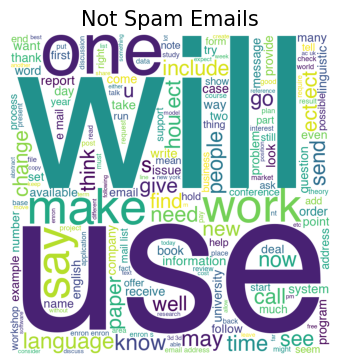

In [18]:
# Plotting Word Cloud for not spam emails
plt.subplot(1, 2, 2)
plt.imshow(not_spam_wordcld)
plt.title('Not Spam Emails', fontsize=15)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()